In [1]:
### import packages
%matplotlib widget

from essential_func import *
from analysis_data  import *
import ipywidgets as widgets

#### NN packages
import torch
from torch import nn
from torch.utils.data import Dataset, DataLoader
from torchvision.transforms import ToTensor, Lambda
import sys, yaml

qgrid2 = np.hstack([np.arange(0.005, 0.0499, 0.001), np.arange(0.05, 0.099, 0.002), np.arange(0.1, 3.2, 0.005)])

In [2]:
### Classification for PDB files
%matplotlib widget
from sklearn import svm
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

labels = ['Abeta', 'Tau']
degs   = ['-3', '-2', '-1', '0', '1', '2', '3']
columns= ['file', 'label'] + degs + ['directory']
ext = 'csv' 
dirs = ['Abeta/Abeta-30L','Tau/Tau-30L']
pdb_dir = "/Users/bashit.a/Documents/Alzheimer/PDB/CSV/Lesions"
qvalues = np.array([0. , 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 , 0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21, 0.22, 0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32, 0.33, 0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43, 0.44, 0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54, 0.55, 0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65, 0.66, 0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76, 0.77, 0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87, 0.88, 0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98, 0.99, 1.  , 1.01, 1.02, 1.03, 1.04, 1.05, 1.06, 1.07, 1.08, 1.09, 1.1 , 1.11, 1.12, 1.13, 1.14, 1.15, 1.16, 1.17, 1.18, 1.19, 1.2 , 1.21, 1.22, 1.23, 1.24, 1.25, 1.26, 1.27, 1.28, 1.29, 1.3 , 1.31, 1.32, 1.33, 1.34, 1.35, 1.36, 1.37, 1.38, 1.39, 1.4 , 1.41, 1.42, 1.43, 1.44, 1.45, 1.46, 1.47, 1.48, 1.49, 1.5 , 1.51, 1.52, 1.53, 1.54, 1.55, 1.56, 1.57, 1.58, 1.59, 1.6 , 1.61, 1.62, 1.63, 1.64, 1.65, 1.66, 1.67, 1.68, 1.69, 1.7 , 1.71, 1.72, 1.73, 1.74, 1.75, 1.76, 1.77, 1.78, 1.79, 1.8 , 1.81, 1.82, 1.83, 1.84, 1.85, 1.86, 1.87, 1.88, 1.89, 1.9 , 1.91, 1.92, 1.93, 1.94, 1.95, 1.96, 1.97, 1.98, 1.99, 2.  ])
# qvalues = np.array([1.34, 0.1 , 0.37])   ### chose q values to use for classification

### computation
## CSV Files q value must be same for all files
qgrid = np.array([0.00E+00, 1.00E-02, 2.00E-02, 3.00E-02, 4.00E-02, 5.00E-02, 6.00E-02, 7.00E-02, 8.00E-02, 9.00E-02, 1.00E-01, 1.10E-01, 1.20E-01, 1.30E-01, 1.40E-01, 1.50E-01, 1.60E-01, 1.70E-01, 1.80E-01, 1.90E-01, 2.00E-01, 2.10E-01, 2.20E-01, 2.30E-01, 2.40E-01, 2.50E-01, 2.60E-01, 2.70E-01, 2.80E-01, 2.90E-01, 3.00E-01, 3.10E-01, 3.20E-01, 3.30E-01, 3.40E-01, 3.50E-01, 3.60E-01, 3.70E-01, 3.80E-01, 3.90E-01, 4.00E-01, 4.10E-01, 4.20E-01, 4.30E-01, 4.40E-01, 4.50E-01, 4.60E-01, 4.70E-01, 4.80E-01, 4.90E-01, 5.00E-01, 5.10E-01, 5.20E-01, 5.30E-01, 5.40E-01, 5.50E-01, 5.60E-01, 5.70E-01, 5.80E-01, 5.90E-01, 6.00E-01, 6.10E-01, 6.20E-01, 6.30E-01, 6.40E-01, 6.50E-01, 6.60E-01, 6.70E-01, 6.80E-01, 6.90E-01, 7.00E-01, 7.10E-01, 7.20E-01, 7.30E-01, 7.40E-01, 7.50E-01, 7.60E-01, 7.70E-01, 7.80E-01, 7.90E-01, 8.00E-01, 8.10E-01, 8.20E-01, 8.30E-01, 8.40E-01, 8.50E-01, 8.60E-01, 8.70E-01, 8.80E-01, 8.90E-01, 9.00E-01, 9.10E-01, 9.20E-01, 9.30E-01, 9.40E-01, 9.50E-01, 9.60E-01, 9.70E-01, 9.80E-01, 9.90E-01, 1.00E+00, 1.01E+00, 1.02E+00, 1.03E+00, 1.04E+00, 1.05E+00, 1.06E+00, 1.07E+00, 1.08E+00, 1.09E+00, 1.10E+00, 1.11E+00, 1.12E+00, 1.13E+00, 1.14E+00, 1.15E+00, 1.16E+00, 1.17E+00, 1.18E+00, 1.19E+00, 1.20E+00, 1.21E+00, 1.22E+00, 1.23E+00, 1.24E+00, 1.25E+00, 1.26E+00, 1.27E+00, 1.28E+00, 1.29E+00, 1.30E+00, 1.31E+00, 1.32E+00, 1.33E+00, 1.34E+00, 1.35E+00, 1.36E+00, 1.37E+00, 1.38E+00, 1.39E+00, 1.40E+00, 1.41E+00, 1.42E+00, 1.43E+00, 1.44E+00, 1.45E+00, 1.46E+00, 1.47E+00, 1.48E+00, 1.49E+00, 1.50E+00, 1.51E+00, 1.52E+00, 1.53E+00, 1.54E+00, 1.55E+00, 1.56E+00, 1.57E+00, 1.58E+00, 1.59E+00, 1.60E+00, 1.61E+00, 1.62E+00, 1.63E+00, 1.64E+00, 1.65E+00, 1.66E+00, 1.67E+00, 1.68E+00, 1.69E+00, 1.70E+00, 1.71E+00, 1.72E+00, 1.73E+00, 1.74E+00, 1.75E+00, 1.76E+00, 1.77E+00, 1.78E+00, 1.79E+00, 1.80E+00, 1.81E+00, 1.82E+00, 1.83E+00, 1.84E+00, 1.85E+00, 1.86E+00, 1.87E+00, 1.88E+00, 1.89E+00, 1.90E+00, 1.91E+00, 1.92E+00, 1.93E+00, 1.94E+00, 1.95E+00, 1.96E+00, 1.97E+00, 1.98E+00, 1.99E+00, 2.00E+0])
q_len = len(qvalues)
q_indices =  np.unique([qgrid_to_indices(qgrid, qvalue=qvalue) for qvalue in qvalues])

df = pd.DataFrame([], columns=columns)

for label in dirs:
    df_l = pd.DataFrame([], columns=columns)
    directory     = os.path.join(pdb_dir, label)
    files_sorted  = cwd_files_search_with(seek_str=ext, search_where = 'end', directory = directory)
    df_l['file']  = files_sorted
    df_l['label'] = label
    df_l['directory'] = directory

    for file in files_sorted:
        df_t = pd.read_csv(os.path.join(directory,file)) ### file '5O3L.csv'
        for deg in degs:
            df_l.loc[df_l['file'] == file, deg] = label+deg if not df_t[deg].isnull().values.any() else df_l[df_l['file'] == file][deg]

    df = pd.concat([df,df_l])
    df.reset_index(drop=True, inplace=True)

display(df)

def X_y(df, labels, degs=degs ):
    y = []
    X = np.zeros((0,q_len))
    pdb   = []
    twist = []

    for label in labels:
        for index in df.index.values:
            for idx, deg_label in enumerate(df.loc[ index ][degs]):  ### loop over all dets
                if str(deg_label).find( label )==0:
                    df_t   = pd.read_csv(os.path.join(df.loc[ index ]['directory'], df.loc[ index ]['file']))
                    X = np.vstack((X,df_t[degs[idx]][q_indices] ))
                    y.append(df[ 'label'][index])
                    pdb.append(df['file'][index].strip('.csv'))
                    twist.append(deg_label)

    y = np.array(y)
    return X, y, pdb, twist

def label_encoder(y):
    le = preprocessing.LabelEncoder()
    le.fit(y)
    le.classes_
    y = le.transform(y)
    #print(y, le.inverse_transform(le.transform(y)))

    return y

X, y, pdb, twist = X_y(df, labels, degs=degs)
print(X.shape, y.shape, len(pdb), len(twist))

### Split and preprocessing - X_train , X_test , y_train, y_test

train_df, test_df = train_test_split(df, test_size=0.3, random_state=10)
X_train, y_train_l, pdb_train, twist_train  = X_y(train_df, labels)
X_test,  y_test_l,  pdb_test,  twist_test   = X_y(test_df, labels)

le = preprocessing.LabelEncoder()
le.fit(y_train_l)
print(le.classes_, '-->', le.transform(le.classes_), '-->', le.inverse_transform(le.transform(le.classes_)))

y_train = label_encoder(y_train_l )
y_test  = label_encoder(y_test_l  )

# min_max_scaler = preprocessing.MinMaxScaler()
# X_train = min_max_scaler.fit_transform(X_train)
# X_test  = min_max_scaler.transform(X_test)

print(f'training data = {len(y_train)} \ntesting data = {len(y_test)}')
print(X_train.shape)

,file,label,-3,-2,-1,0,1,2,3,directory
0,2LMO.csv,Abeta/Abeta-30L,Abeta/Abeta-30L-3,Abeta/Abeta-30L-2,Abeta/Abeta-30L-1,Abeta/Abeta-30L0,Abeta/Abeta-30L1,Abeta/Abeta-30L2,Abeta/Abeta-30L3,/Users/bashit.a/Documents/Alzheimer/PDB/CSV/Le...
1,2LMQ.csv,Abeta/Abeta-30L,Abeta/Abeta-30L-3,Abeta/Abeta-30L-2,Abeta/Abeta-30L-1,Abeta/Abeta-30L0,Abeta/Abeta-30L1,Abeta/Abeta-30L2,Abeta/Abeta-30L3,/Users/bashit.a/Documents/Alzheimer/PDB/CSV/Le...
2,2M4J.csv,Abeta/Abeta-30L,Abeta/Abeta-30L-3,Abeta/Abeta-30L-2,Abeta/Abeta-30L-1,Abeta/Abeta-30L0,Abeta/Abeta-30L1,Abeta/Abeta-30L2,Abeta/Abeta-30L3,/Users/bashit.a/Documents/Alzheimer/PDB/CSV/Le...
3,2MVX.csv,Abeta/Abeta-30L,Abeta/Abeta-30L-3,Abeta/Abeta-30L-2,Abeta/Abeta-30L-1,Abeta/Abeta-30L0,Abeta/Abeta-30L1,Abeta/Abeta-30L2,Abeta/Abeta-30L3,/Users/bashit.a/Documents/Alzheimer/PDB/CSV/Le...
4,2NAO.csv,Abeta/Abeta-30L,Abeta/Abeta-30L-3,Abeta/Abeta-30L-2,Abeta/Abeta-30L-1,Abeta/Abeta-30L0,Abeta/Abeta-30L1,Abeta/Abeta-30L2,Abeta/Abeta-30L3,/Users/bashit.a/Documents/Alzheimer/PDB/CSV/Le...
5,2mpz.csv,Abeta/Abeta-30L,Abeta/Abeta-30L-3,Abeta/Abeta-30L-2,Abeta/Abeta-30L-1,Abeta/Abeta-30L0,Abeta/Abeta-30L1,Abeta/Abeta-30L2,Abeta/Abeta-30L3,/Users/bashit.a/Documents/Alzheimer/PDB/CSV/Le...
6,5AEF.csv,Abeta/Abeta-30L,Abeta/Abeta-30L-3,Abeta/Abeta-30L-2,Abeta/Abeta-30L-1,Abeta/Abeta-30L0,Abeta/Abeta-30L1,Abeta/Abeta-30L2,Abeta/Abeta-30L3,/Users/bashit.a/Documents/Alzheimer/PDB/CSV/Le...
7,5KK3.csv,Abeta/Abeta-30L,Abeta/Abeta-30L-3,Abeta/Abeta-30L-2,Abeta/Abeta-30L-1,Abeta/Abeta-30L0,Abeta/Abeta-30L1,Abeta/Abeta-30L2,Abeta/Abeta-30L3,/Users/bashit.a/Documents/Alzheimer/PDB/CSV/Le...
8,5OQV.csv,Abeta/Abeta-30L,Abeta/Abeta-30L-3,Abeta/Abeta-30L-2,Abeta/Abeta-30L-1,Abeta/Abeta-30L0,Abeta/Abeta-30L1,Abeta/Abeta-30L2,Abeta/Abeta-30L3,/Users/bashit.a/Documents/Alzheimer/PDB/CSV/Le...
9,6SHS.csv,Abeta/Abeta-30L,Abeta/Abeta-30L-3,Abeta/Abeta-30L-2,Abeta/Abeta-30L-1,Abeta/Abeta-30L0,Abeta/Abeta-30L1,Abeta/Abeta-30L2,Abeta/Abeta-30L3,/Users/bashit.a/Documents/Alzheimer/PDB/CSV/Le...


(224, 201) (224,) 224 224
['Abeta/Abeta-30L' 'Tau/Tau-30L'] --> [0 1] --> ['Abeta/Abeta-30L' 'Tau/Tau-30L']
training data = 154 
testing data = 70
(154, 201)


In [4]:
### some stats
from scipy.signal import find_peaks

df_stat = pd.DataFrame(columns=['pdb', 'twist', 'peakQ', 'length'])
lidx, uidx = 100, 201
for i in range(len(obj.df)):
    df_stat.at[i,'pdb']   = obj.df.pdb[i]
    df_stat.at[i,'twist'] = obj.df.twist[i]
    
    peaks,_ = find_peaks(obj.df.iloc[i]['Iq'][lidx:uidx], distance=100)
    df_stat.at[i,'peakQ'] = np.float32(qvalues[lidx:uidx][peaks])
    df_stat.at[i,'length'] = obj.df.length[i]
print(df_stat['peakQ'].value_counts(), df_stat['peakQ'].astype(np.float32).describe() )

nums = df_stat.iloc[::]['peakQ'].value_counts(bins=3, normalize=False)
print(nums)

peakQ
1.35    2397
1.34    2239
1.36    1334
1.33     980
1.37     839
1.38     702
1.32     472
1.4      373
1.39     372
1.42     193
1.41     139
1.3      115
1.45     114
1.31     111
1.5      103
1.49      88
1.48      77
1.46      72
1.51      67
1.44      61
1.29      55
1.52      54
1.47      48
1.25      35
1.43      33
1.24      24
1.26      22
1.2       19
1.27      19
1.28      16
1.66      16
1.22      15
1.6       14
1.18      12
1.23      12
1.53      11
1.67      11
1.63       8
1.1        7
1.64       6
1.57       6
1.68       5
1.21       5
1.61       5
1.16       4
1.56       4
1.54       4
1.58       4
1.55       4
1.15       3
1.17       3
1.59       2
1.13       2
1.14       2
1.65       1
1.62       1
Name: count, dtype: int64 count    11340.000000
mean         1.361476
std          0.048601
min          1.100000
25%          1.340000
50%          1.350000
75%          1.370000
max          1.680000
Name: peakQ, dtype: float64
(1.293, 1.487]    10671
(1.487, 1.68

In [5]:
print(df_stat.groupby(['pdb','twist'])['peakQ'].value_counts(bins=2).to_frame().to_string())

                                        count
pdb  twist peakQ                             
2LMO -1    (1.35, 1.39]                    49
           (1.3090000000000002, 1.35]       1
     -2    (1.355, 1.4]                    49
           (1.3090000000000002, 1.355]      1
     -3    (1.36, 1.41]                    48
           (1.3090000000000002, 1.36]       2
     0     (1.345, 1.38]                   49
           (1.3090000000000002, 1.345]      1
     1     (1.345, 1.38]                   49
           (1.3090000000000002, 1.345]      1
     2     (1.345, 1.38]                   49
           (1.3090000000000002, 1.345]      1
     3     (1.345, 1.38]                   49
           (1.3090000000000002, 1.345]      1
2LMQ -1    (1.3390000000000002, 1.425]     49
           (1.425, 1.51]                    1
     -2    (1.3390000000000002, 1.425]     49
           (1.425, 1.51]                    1
     -3    (1.3390000000000002, 1.425]     49
           (1.425, 1.51]          

In [6]:
df_stat[df_stat.apply(lambda x: x['peakQ']> 1.487 and x['length']>=10, axis=1)]['pdb'].unique()

array(['2MVX', '2MPZ', '5KK3'], dtype=object)

In [3]:
### PDB scattering plot

%matplotlib widget
import ipywidgets as widgets

out = widgets.Output()

class pdb_widgets(object):
    def __init__(self, csv_obj):

        PDB_options      = csv_obj.df['pdb'].unique().tolist()
        twist_options    = csv_obj.degs_each_pdb
        lesions_options  = csv_obj.df['lesion'].unique().tolist()
        length_options   = csv_obj.df['length'].unique().tolist()
        
        self.df = csv_obj.df
        self.q  = csv_obj.q

        ### widgets
        layout = widgets.Layout(width='200px')
        self.lesions  = widgets.SelectMultiple(options=lesions_options, value = lesions_options, description='Lesions', layout=layout,orientation='vertical')
        self.PDB      = widgets.SelectMultiple(options=PDB_options,     value = PDB_options, description='PDB', disabled=False, layout=layout)
        self.twist    = widgets.SelectMultiple(options=twist_options,   value = twist_options, description='Twist', layout=layout)
        self.length   = widgets.SelectMultiple(options=length_options,  value = length_options, description='Length', layout=layout)
        self.plot_q   = widgets.FloatRangeSlider( value=(0.5, 2), min=self.q.min(),   max=self.q.max(), step=0.005,    description='plot_q:',  disabled=False,  continuous_update=False,  orientation='vertical',  readout=True, readout_format='.3f',layout=ipywidgets.Layout(width='50%') )

        plt.close('all')

        self.f, self.axs = plt.subplots(1,1)

        args = {'pdb_items'    : self.PDB     ,\
                'lesion_items' : self.lesions ,\
                'twist_items'  : self.twist   ,\
                'length_items' : self.length  ,\
                'plot_q'       : self.plot_q}

        self.plot_data = widgets.interactive_output(self.plot, args)

    @out.capture(clear_output=True)
    def plot(self, pdb_items, lesion_items, twist_items, length_items, plot_q ):
        with out:
            out.clear_output()
            self.axs.clear()
            
            indices = self.df [ self.df['pdb'].isin(list( pdb_items ))       &\
                                self.df['lesion'].isin(list( lesion_items )) &\
                                self.df['twist'].isin(list( twist_items ))   &\
                                self.df['length'].isin(list( length_items )) ].index
            
            y = np.vstack( self.df.iloc[indices]['Iq'] ).T
            x = np.repeat(self.q.reshape(-1,1), y.shape[1], axis=1)
            plot_minQ, plot_maxQ = plot_q
            idx_start, idx_end   = qgrid_to_indices(self.q, plot_minQ) , qgrid_to_indices(self.q, plot_maxQ)
            self.axs.plot(x[idx_start : idx_end, :], y[idx_start : idx_end, :], label= f'{self.df.iloc[indices]["pdb"].values}' + ":" + f'{self.df.iloc[indices]["length"].values}' + "L" + f'{self.df.iloc[indices]["twist"].values}')
            # self.axs.legend(prop={'size': 8})
            self.axs.set_title('PDB plot')
            self.axs.set_xlabel('q ->')
            self.axs.set_ylabel('I(q) ->')
            plt.show()
            print(pdb_items, lesion_items, twist_items, length_items)
            print( self.df.iloc[indices][['pdb', 'lesion', 'twist', 'length']])

class CSVExtract(object):

    def __init__(self):
        self.pdb      = []
        self.file_loc = []
        self.twist    = []
        self.lesion   = []
        self.length   = [] 
        self.degs     = []
        self.Iq       = []
        self.ext_csv  = '.csv'
        self.degs_each_pdb     = ['-3', '-2', '-1', '0', '1', '2', '3']

    def get_csv_files(self, path):
        for root, dir, files in os.walk(path):

            for name in files:
                if name.endswith((self.ext_csv)):
                    file_loc       = os.path.join(root, name)
                    lesion, pdb, length = self.parse_str(file_loc)
                    
                    self.lesion +=   7*[lesion]
                    self.length +=   7*[length]
                    self.pdb    +=   7*[pdb]
                    self.file_loc += 7*[file_loc]
                    
                    df_temp = pd.read_csv(file_loc, delimiter = ',')
                    for deg in self.degs_each_pdb:
                        self.degs.append(deg) 
                        self.Iq.append(df_temp[deg].tolist())
        
        self.q = df_temp['q'].to_numpy()
        self.df = pd.DataFrame({'pdb':obj.pdb, 'lesion':obj.lesion, 'twist': obj.degs, 'length':obj.length, 'file_loc':obj.file_loc, 'Iq':obj.Iq})

    @staticmethod
    def parse_str(str_input):
        pdb    = str_input.split('/')[-1].split('.csv')[0]
        lesion = str_input.split('/')[-2].split('-')[0]
        length = str_input.split('/')[-2].split('-')[1].split('L')[0]
        return lesion, pdb, length
        

# folder_path = "/Users/bashit.a/Documents/Alzheimer/PDB/PDB-Dataset"
# obj = CSVExtract()
# obj.get_csv_files(folder_path)
# obj.df

degs_each_pdb     = ['-3', '-2', '-1', '0', '1', '2', '3']
folder_path = "/Users/bashit.a/Documents/Alzheimer/PDB/PDB-Dataset/"
obj = PDBDataset(folder_path, degs_each_pdb)
obj.df

widgets_obj = pdb_widgets(obj)

items      = [widgets_obj.lesions, widgets_obj.PDB, widgets_obj.twist, widgets_obj.length, widgets_obj.plot_q]
vbox = widgets.VBox(children=items)
hbox = widgets.HBox(items)

accordion = widgets.Accordion(children=[hbox], titles=['Slider'], selected_index=0)
tab       = widgets.Tab(children = [accordion, widgets.IntSlider()] , titles = ['1','2'])
tab
display(tab, out)
# lesions = widgets.SelectMultiple(options=['Abeta','Tau'], value = ['Abeta'], description='Lesions')
pass

NameError: name 'PDBDataset' is not defined

In [4]:
### load input data
import sys, os
sys.path.insert(1, os.path.join(os.getcwd(), 'ML', 'dataloader'))
sys.path.insert(1, os.path.join(os.getcwd(), 'ML', 'models'))
from lesions import *


lidx =  250
uidx =  340
column_names= {"Tissue":0.}    # {"Diffuse_Plaque":0., "Neurofibrillary_Tangle_(tau)":1. , "Tau":2. ,"Neuritic_Plaque":3., "Tissue":4., "bkg":5.0 }
Excel_File  = "/Users/bashit.a/Documents/Alzheimer/Mar-2023/Mar-2023-Samples-updated.xlsx"   # "/home/bashit.a/Codes/ML/Mar-2023-Samples.xlsx"   "/Users/bashit.a/Documents/Alzheimer/Mar-2023/Mar-2023-Samples.xlsx"    sheet       = 'Mar-2023-Samples'
BNL_dir     = '/Volumes/HDD/BNL-Data/Mar-2023'    # '/Volumes/HDD/BNL-Data/Mar-2023'         '/scratch/bashit.a/BNL-Data/Mar-2023'
sub_dir     = "CSV_Conv-8-point"  # CSV_Conv-8-point  CSV
val_files   = ["1898_CING-roi0_0_0_masked_intp.h5", "1948_EC-roi1_0_0_masked.h5","1948 V1-roi0_0_0_masked.h5","1948_PHG-roi1_0_0_masked.h5"] # None ["1948_HIPPO-roi1_0_0_masked_intp.h5", "2428-roi1_0_0_masked_intp.h5"]
sheet       = 'Mar-2023-Samples'
mica_sub = True
scaling  = False


column_names= {"Tissue":1.}
split_dataset    = train_val_split_dataset(get_dataframe_with_files_loc)
df_train, df_val = split_dataset(Excel_File, sheet, BNL_dir, sub_dir, val_files)
dataset_train = XrayData(df_train, column_names, BNL_dir, sub_dir, lidx=lidx, uidx=uidx, mica_sub=mica_sub, scaling=scaling, tissue_sub=True)
training_loader = DataLoader(dataset_train, batch_size=1024, num_workers=0)

column_names      = {"Diffuse_Plaque":1.}
dataset_val       = XrayData(df_val, column_names, BNL_dir, sub_dir, lidx=lidx, uidx=uidx, mica_sub=mica_sub, scaling=scaling, tissue_sub=True)
validation_loader = DataLoader(dataset_val, batch_size=1024, num_workers=0)

Tissue : contains 239 samples
Diffuse_Plaque : contains 46 samples


In [638]:
### Saving bkg intensity into pickles
import pickle

mica_file = '/Users/bashit.a/Documents/Alzheimer/Codes/mica.pickle'
path = '/Volumes/HDD/BNL-Data/Mar-2023/1948/CSV_Conv-8-point/'
file = '1948_EC-roi1_0_0_masked.h5_merged.csv'
mica_frames = [494, 495, 496]
df_mica = pd.read_csv(os.path.join(path, file), delimiter=',')
Iq_bkg  = df_mica.iloc[mica_frames].to_numpy()
Iq_bkg  = np.mean(Iq_bkg, axis=0, keepdims=True)
bkg = {'Iq_bkg':Iq_bkg, 'labels_out':0, 'frames_out': mica_frames, 'files_out':file }

with open(mica_file, 'wb') as handle:
    pickle.dump(bkg, handle, protocol=pickle.HIGHEST_PROTOCOL)

with open(mica_file, 'rb') as handle:
    data = pickle.load(handle)

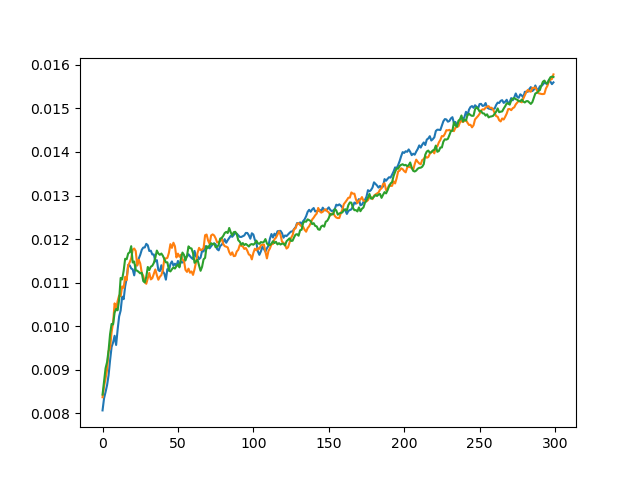

In [610]:
Iq_bkg  = df_mica.iloc[mica_frames].to_numpy()
plt.figure()
plt.plot(Iq_bkg[:,plt_lidx:plt_uidx].T)

In [60]:
df = pd.DataFrame(columns=  ['in_frames', 'tissue_frames', 'bkg_frames', 'File_Loc', 'Width', 'Height', 'sel_tissue_frames', 'sel_tissue_mf', 'sel_tissue_area', 'sel_IqBSTF', 'sel_IqBSTF_avg', 'sel_IqBSTS', 'Iq', 'Iq_bkg', 'Iq_BS'])
df.at[0, 'File_Loc']     = '/Volumes/HDD/BNL-Data/Mar-2023/1898/CSV_Conv-8-point/1898_CING-roi0_0_0_masked_intp.h5_merged.csv'
df.at[0, 'Width']        = 41
df.at[0, 'Height']       = 41
df.at[0, 'in_frames']    = [129, 201, 211, 275, 283, 295, 359, 360, 361, 364, 377, 443, 521, 528, 626, 689]
df.at[0, 'bkg_frames']   = [379]

df.at[1, 'File_Loc']     = '/Volumes/HDD/BNL-Data/Mar-2023/1898/CSV_Conv-8-point/1898_EC-roi1_0_0_masked_intp.h5_merged.csv'
df.at[1, 'Width']        = 61
df.at[1, 'Height']       = 61
df.at[1, 'in_frames']    = [2, 3, 4, 123, 2886, 2887, 2941, 3065, 3134, 3135, 2429, 2530, 2531, 2552, 2553, 2654, 2655, 2656, 2676, 2677, 2778, 2779, 2800, 2801, 2802, 2902, 821, 913, 914, 944, 945, 946, 1035, 1036, 1037, 1038, 1039, 1159, 1160, 1068, 1069, 1070, 1071, 1072, 1161, 1162, 1163, 1164, 1193, 1194, 1195, 1151, 1152, 1204, 1207, 1208, 1272, 1275, 1326, 1328, 1329, 1331, 1334, 1394, 1395, 1397, 1398, 1399, 1452, 1453, 1456, 1457, 1517, 1518, 1519, 1523, 1579, 1580, 1581, 1643]
df.at[1, 'bkg_frames']   = {'1898_EC_bkg-roi0_0_0_masked.h5' :[17] }

('1898_EC_bkg-roi0_0_0_masked.h5', [17])

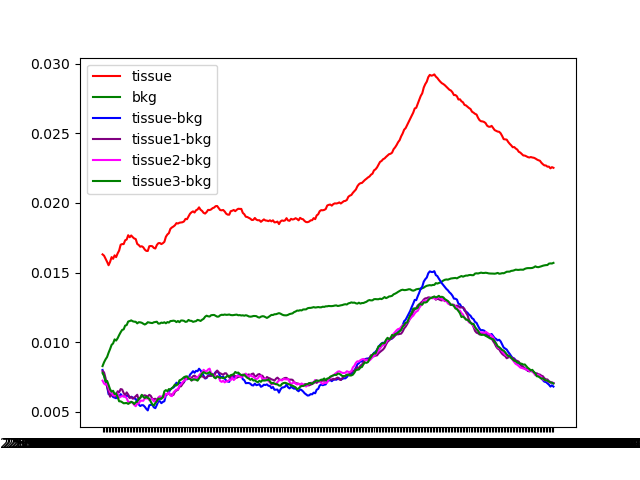

In [10]:
# file_loc = "/Volumes/HDD/BNL-Data/Mar-2023/1948/CSV/1948 V1-roi0_0_0_masked.h5_merged.csv"
import pandas as pd

df_temp = pd.read_csv('/Volumes/HDD/BNL-Data/Mar-2023/1948/CSV_Conv-8-point/1948 V1-roi0_0_0_masked.h5_merged.csv', delimiter=',')  # # '/Volumes/HDD/BNL-Data/Mar-2023/1948/CSV/1948 V1-roi0_0_0_masked.h5_merged.csv'  '/Volumes/HDD/BNL-Data/Mar-2023/1948/CSV_Conv-8-point/1948 V1-roi0_0_0_masked.h5_merged.csv'
Iq_tf = df_temp.iloc[2162][plt_lidx:plt_uidx]
with open(mica_file, 'rb') as handle:
    data = pickle.load(handle)
Iq_bkg = data['Iq_bkg'][0,plt_lidx:plt_uidx]

plt.close('all')
plt.figure()
plt.plot( Iq_tf, color = 'red', label='tissue')
plt.plot( Iq_bkg, color = 'green', label='bkg')
plt.plot( Iq_tf - Iq_bkg, color = 'blue', label='tissue-bkg')
plt.plot( 0.78*(df_temp.iloc[2057][plt_lidx:plt_uidx] - Iq_bkg), color = 'purple', label='tissue1-bkg')
plt.plot( 0.77*(df_temp.iloc[1911][plt_lidx:plt_uidx] - Iq_bkg), color = 'magenta', label='tissue2-bkg')
plt.plot( 0.82*(df_temp.iloc[2158][plt_lidx:plt_uidx] - Iq_bkg), color = 'green', label='tissue3-bkg')
plt.legend()

('/Volumes/HDD/BNL-Data/Mar-2023/1898/CSV_Conv-8-point/1898_CING-roi0_0_0_masked_intp.h5_merged.csv',
 617)

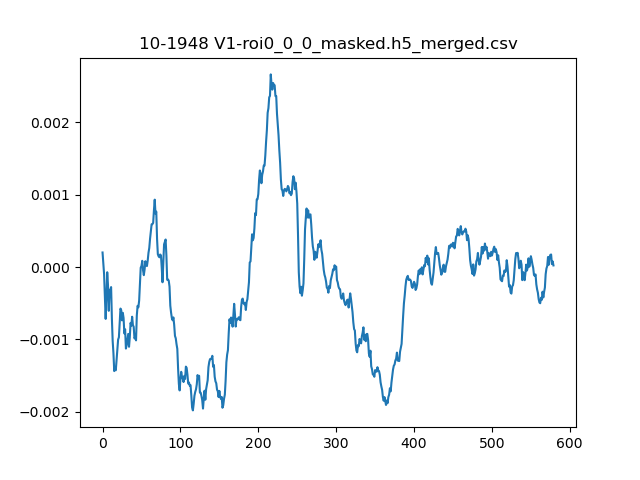

In [574]:
### testing experimental data
idx = 10
plt.figure()
# plt.plot(Iq_intp[0])
plt.plot(dataset_val.x[idx][100:-10])
plt.title(f'-{dataset_val.files[idx].split("/")[-1]}-{idx}')
dataset_val.files[1], dataset_val.frames[0]

ValueError: setting an array element with a sequence.

In [40]:
# np.unique(flatten([i for i in df['pdb']]))
import plotly.graph_objects as go
import plotly.express as px

fig = px.scatter(x=np.arange(0,len(metric),1), y=metric, symbol=obj.df.lesion.values.astype(str), color=metric, hover_data=[obj.df.pdb.values.astype(str)])

# fig = px.scatter(x=np.arange(0,len(metric),1), y=metric, color=obj.df.lesion.values)

# fig  = go.Figure(trace1)
# fig.add_trace(px.scatter(x= idx , y = metric[idx], color=5*[0]))
fig.show()

NameError: name 'metric' is not defined

In [565]:
unique, counts = np.unique([df.iloc[idx]['pdb'][0] for idx in range(len(df))], return_counts=True)
unique, counts

(array(['2LMQ', '2M4J', '5O3L', '5O3T', '6HRF', '6NWP', '6NWQ', '6OC9',
        '6QJM', '6QJQ', '6SHS', '6TJO', '6TJX', '6VH7', '6VHA', '6VHL',
        '6VI3', '6W0O'], dtype='<U4'),
 array([1, 2, 3, 8, 3, 4, 2, 4, 1, 5, 1, 3, 3, 3, 2, 1, 3, 1]))

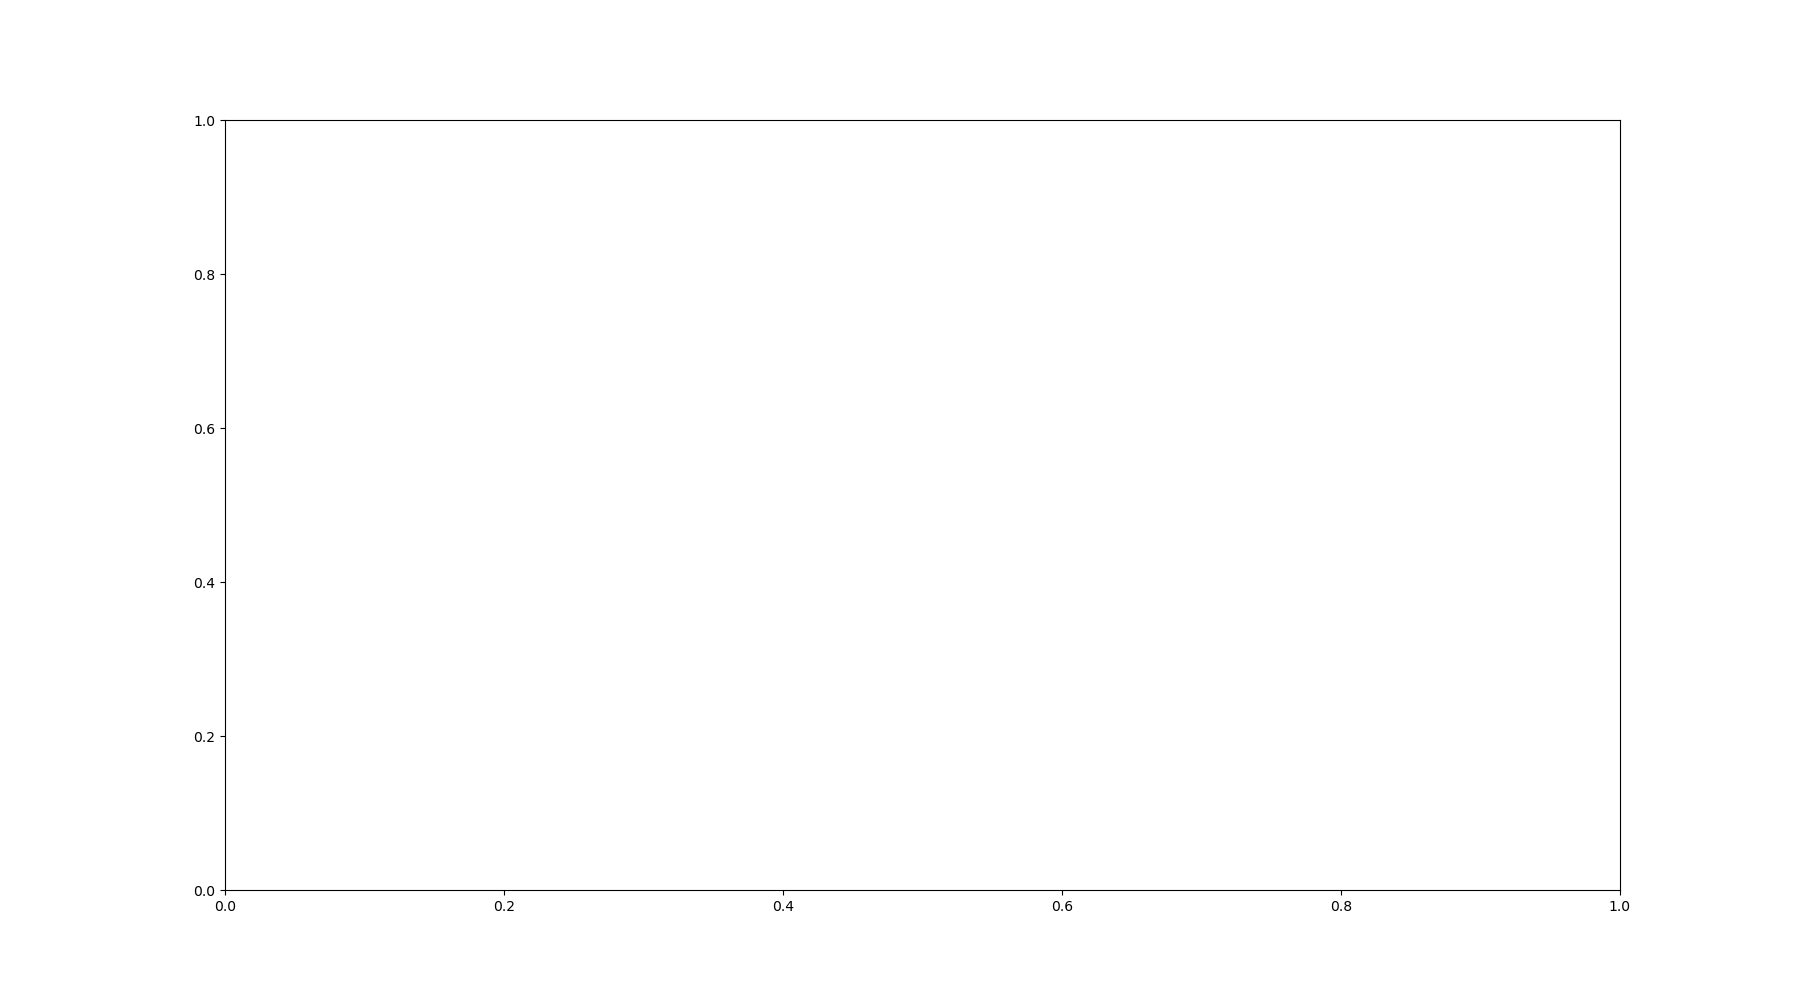

interactive(children=(SelectMultiple(description='categories', index=(0,), options=('Abeta/Abeta-30L-1', 'Abet…

In [4]:
### 2D and 3D visualization
%matplotlib widget
from mpl_toolkits.mplot3d import Axes3D

plt.close('all')
fig, ax = plt.subplots(figsize=(18,10))

#### ref - https://www.geeksforgeeks.org/find-location-of-an-element-in-pandas-dataframe-in-python/
def getIndexes(dfObj, value):
    listOfPos = []   # Empty list
    result = dfObj.isin([value])  # isin() method will return a dataframe with boolean values, True at the positions where element exists
    seriesObj = result.any()      # any() method will return a boolean series
    columnNames = list(seriesObj[seriesObj == True].index)      # Get list of column names where element exists
    for col in columnNames:   # Iterate over the list of columns and extract the row index where element exists
        rows = list(result[col][result[col] == True].index)
        for row in rows:
            listOfPos.append((row, col))  # This list contains a list tuples with the index of element in the dataframe
    return listOfPos

def update_plot(label_fun):
    global ax
    if len(qvalues) == 2:
        ax.clear()
        plot_contours(ax, clf, xx, yy, cmap=plt.cm.coolwarm, alpha=0.3)
        ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k',label=f'train-{len(X)}points')
        ax.set_ylabel('y label here')
        ax.set_xlabel('x label here')
        ax.set_xticks(())
        ax.set_yticks(())
        ax.set_title(title)
        ax.legend()

        if not any(list(map(lambda x : x=='nan', label_fun))):
            for label_t in label_fun:
                listOfPositions = getIndexes(df, label_t) #  [(0, '-2'), (1, '-2'), (2, '-2'), (3, '-2'), (5, '-2'), (6, '-2'), (7, '-2'), (8, '-2')] print(listOfPositions)  # Printing the position
                X_t = np.zeros((0,q_len))
                for index,col in listOfPositions:
                    df_t   = pd.read_csv(os.path.join(df.loc[ index ]['directory'], df.loc[ index ]['file']))
                    X_t      = np.vstack((X_t,df_t[col][q_indices] ))

                ax.scatter(X_t[:,0], X_t[:,1],marker='D', label=f'{label_t}')
            ax.legend(fontsize=8)

    elif len(qvalues) == 3:
        z = lambda x,y: (-clf.intercept_[0]-clf.coef_[0][0]*x -clf.coef_[0][1]*y) / clf.coef_[0][2]  # Solve for w3 (z) The equation of the separating plane is given by all x so that np.dot(svc.coef_[0], x) + b = 0.

        tmp = np.linspace(np.min(X),np.max(X),10)
        x0,x1 = np.meshgrid(tmp,tmp)

        ax  = fig.add_subplot(111, projection='3d')
        ax.clear()

        ax.scatter(X[:,0], X[:,1], X[:,2], c=label_encoder(y), cmap=plt.cm.coolwarm, s=60, edgecolors='k')
#         ax.plot_surface(x0, x1, z(x0,x1), alpha=0.2)
#         ax.view_init(21, 118)
        ax.view_init(-60, 90)

        if not any(list(map(lambda x : x=='nan', label_fun))):
            for label_t in label_fun:
                listOfPositions = getIndexes(df, label_t) #  [(0, '-2'), (1, '-2'), (2, '-2'), (3, '-2'), (5, '-2'), (6, '-2'), (7, '-2'), (8, '-2')] print(listOfPositions)  # Printing the position
                X_t = np.zeros((0,q_len))
                for index,col in listOfPositions:
                    df_t   = pd.read_csv(os.path.join(df.loc[ index ]['directory'], df.loc[ index ]['file']))
                    X_t    = np.vstack((X_t,df_t[col][q_indices] ))

                ax.scatter(X_t[:,0], X_t[:,1], X_t[:,2], marker='D', s=120, label=f'{label_t}')
#                 ax.plot3D(X_t[:,0], X_t[:,1], X_t[:,2],'sr')
            ax.legend(fontsize=8)

# plt.tight_layout()
plt.show()
labels_all = []
for deg in degs:
    labels_all.extend(df[deg].unique())
labels_all = np.array(np.unique(labels_all))
labels_all = labels_all[np.unique(labels_all) != 'nan']
labels_all = np.append(labels_all,'nan')

label_w = ipywidgets.SelectMultiple(options=labels_all, value=[labels_all[0]], description='categories') #rows=10,,disabled=False
out = ipywidgets.interactive(update_plot, label_fun=label_w)
display(out)

In [13]:
### Visualize PDB file
%matplotlib widget
import nglview as nv

pdb_file = "/Users/bashit.a/Documents/Alzheimer/PDB/Deepti Murthy/Abeta/5OQV/5OQV30L-2D.pdb"
### computation
# from Bio.PDB import *
# pdb_parser = PDBParser()
# structure = pdb_parser.get_structure(_,pdb_file)
# view = nv.show_biopython(structure)
# view

view = nv.show_file(pdb_file, default=False)
view.add_cartoon(selection="protein")
# view.add_surface(selection="protein", opacity=0.3)
view.center()  # view.camera = 'orthographic'
view

NGLWidget()

low valid idx = 0, low valid Q = 0.000, high valid idx = 4999 , high valid Q = 3.200


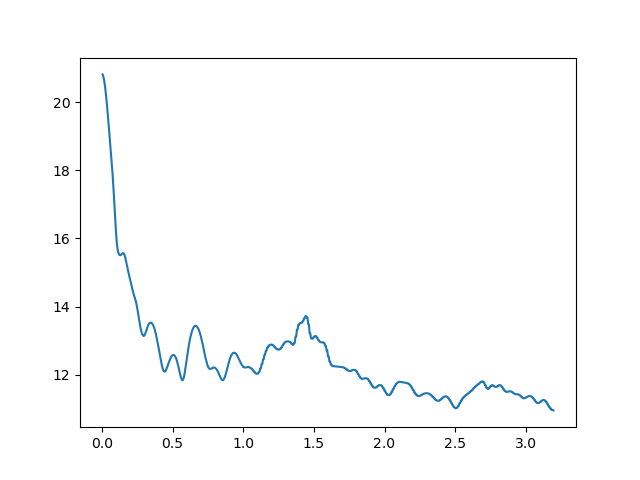

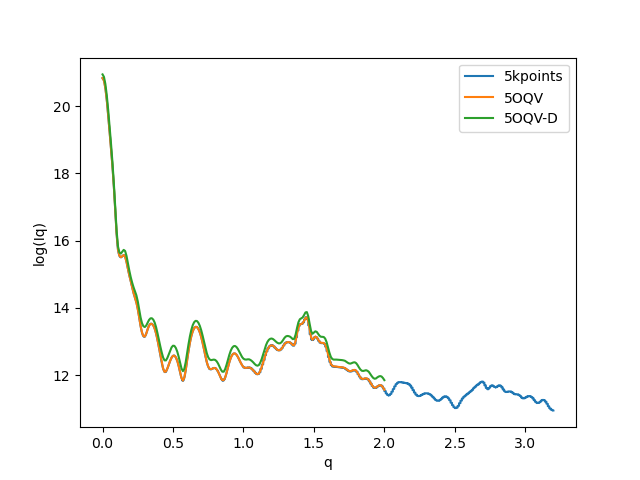

In [16]:
### crysol plots
%matplotlib widget

df1 = pd.read_csv("/Users/bashit.a/Documents/Alzheimer/PDB/5OQV/5kpoints/5oqv3deg5k.csv")
df2 = pd.read_csv("/Users/bashit.a/Documents/Alzheimer/PDB/5OQV/5oqv3deg.csv")
df3 = pd.read_csv("/Users/bashit.a/Documents/Alzheimer/PDB/5OQV/5OQV-3deg-Deepti.csv")

plt.close('all')
plt.figure()
plt.plot(df1['q'], np.log(df1['Iq']),label='5kpoints');
plt.plot(df2['q'], np.log(df2['Iq']), label='5OQV');
plt.plot(df3['q'], np.log(df3['Iq']), label='5OQV-D');
plt.xlabel('q');
plt.ylabel('log(Iq)');
plt.legend();


### crysol plots - qgrid2 vs PDB qgrid interpolation

%matplotlib widget
idx_l, idx_u, valid_diff_values = valid_idx_search(np.array(df1['q']), np.array([df1['Iq']]), show_q = True)
Iq = np.interp(qgrid2, np.array(df1['q']), np.array(df1['Iq']))
idx_l, idx_u, valid_diff_values = valid_idx_search(qgrid2, Iq.reshape(1,-1))

plt.figure()
plt.plot(qgrid2, np.log(Iq))
plt.show()

In [5]:
#### Visualize dataset
%matplotlib widget
import plotly.express as px
import seaborn as sns
from sklearn.decomposition import PCA

data_input_w    = ipywidgets.RadioButtons(options=['all', 'trained', 'testing'],value='all')
preprocessing_w = ipywidgets.RadioButtons(options=['no_scaling', 'min_max', 'standard_scalar'],value='no_scaling')
plot_type_w     = ipywidgets.RadioButtons(options=['RAW-DATA', 'PCA'],value='RAW-DATA')

dimension_w     = ipywidgets.RadioButtons(options=['2D', '3D'],value='3D')
dim_1_w         = ipywidgets.SelectionSlider(options = qgrid, value = 0.6, orientation='vertical' , description='x-qgrid', continuous_update=False, style = {'description_width': 'initial'})
dim_2_w         = ipywidgets.SelectionSlider(options = qgrid, value = 1.2, orientation='vertical' , description='y-qgrid', continuous_update=False, style = {'description_width': 'initial'})
dim_3_w         = ipywidgets.SelectionSlider(options = qgrid, value = 1.34, orientation='vertical' , description='z-qgrid', continuous_update=False, style = {'description_width': 'initial'})

classifier_w    = ipywidgets.RadioButtons(options=['SVM', 'KMeans', 'Meanshift'],value='SVM')


min_max_scaler = preprocessing.MinMaxScaler()
scaler         = preprocessing.StandardScaler()

def plot_data_func(data_input_w, preprocessing_w, plot_type_w, dimension_w, dim_1_w ,dim_2_w ,dim_3_w ):
    
    q_indices =  np.array([qgrid_to_indices(qgrid, qvalue=qvalue) for qvalue in [dim_1_w ,dim_2_w ,dim_3_w]])

    print('{}'.format(qgrid[q_indices]))

    pca = PCA(n_components= 3 if dimension_w=='3D' else 2)

    
#     x1,y1,z1 = zip(*X[np.where(y==1)][:,q_indices])
#     x2,y2,z2 = zip(*X[np.where(y==0)][:,q_indices])

#     fig, ax = plt.subplots(figsize=(12,10))   

#     ax  = fig.add_subplot(111, projection='3d')
#     ax.clear()

#     ax.scatter(x1,y1,z1, c='r', cmap=plt.cm.coolwarm, s=60, marker='o', label='tau')
#     ax.scatter(x2,y2,z2, c='b', cmap=plt.cm.coolwarm, s=60,  marker='x', label='abeta')

#     ax.set(xlabel=f'X-->{qgrid[q_indices[0]]}', ylabel=f'Y-->{qgrid[q_indices[1]]}', zlabel=f'Z-->{qgrid[q_indices[2]]}')
#     ax.view_init(-30, -120)
#     ax.legend()

    if data_input_w == 'all':
        
        if preprocessing_w == 'min_max':
            x1,y1,z1  = zip(*min_max_scaler.fit_transform(X[:,q_indices]))  
        elif preprocessing_w == 'standard_scalar':    
            x1,y1,z1  = zip(*scaler.fit_transform(X[:,q_indices]))  
        else:
            x1,y1,z1 = zip(*X[:,q_indices])

        if plot_type_w =='PCA': 
            x1,y1,z1 = zip(*pca.fit(X).transform(X))

        twist1   = twist
        pdb1     = pdb
        label1   = y

    elif data_input_w == 'trained':

        if preprocessing_w == 'min_max':
            x1,y1,z1  = zip(*min_max_scaler.fit_transform(X_train[:,q_indices]))  
        elif preprocessing_w == 'standard_scalar':    
            x1,y1,z1  = zip(*scaler.fit_transform(X_train[:,q_indices]))  
        else:
            x1,y1,z1 = zip(*X_train[:,q_indices])

        twist1   = twist_train
        pdb1     = pdb_train
        label1   = y_train_l

    elif data_input_w == 'testing':
        if preprocessing_w == 'min_max':
            x1,y1,z1  = zip(*min_max_scaler.fit_transform(X_test[:,q_indices]))
        elif preprocessing_w == 'standard_scalar':    
            x1,y1,z1  = zip(*scaler.fit_transform(X_test[:,q_indices]))
        else:
            x1,y1,z1 = zip(*X_test[:,q_indices])

        twist1   = twist_test
        pdb1     = pdb_test
        label1   = y_test_l

#     fig = px.scatter_3d(x=x1, y=y1, z=z1,
#                   color=y, symbol=pdb, hover_name=twist, template="plotly_white")

    fig = px.line_3d(x=x1, y=y1, z=z1, 
                        color=label1, symbol=pdb1, hover_name=twist1, template="plotly_white")
    fig.update_layout(
        autosize=True,
        width=1400,
        height=800,
        scene=dict(
            xaxis_title=f'q={dim_1_w }',
            yaxis_title=f'q={dim_2_w }',
            zaxis_title=f'q={dim_3_w }',

        )
    )
    fig.show()

    df_pairwise = pd.DataFrame([x1, y1, z1]).T # le.inverse_transform(y_train)]
    df_pairwise = df_pairwise.assign(label=label1)
    fig = px.scatter_matrix(df_pairwise,) #  hue="label",palette="bright"
    fig.show()

plot_data = ipywidgets.interactive_output(plot_data_func, { 'data_input_w' : data_input_w    ,\
                                                            'preprocessing_w' : preprocessing_w ,\
                                                            'plot_type_w': plot_type_w,\
                                                            'dimension_w' : dimension_w     ,\
                                                            'dim_1_w' : dim_1_w         ,\
                                                            'dim_2_w' : dim_2_w         ,\
                                                            'dim_3_w' : dim_3_w     })

accordion_data            = ipywidgets.Accordion(children = [ipywidgets.VBox([ipywidgets.HBox([data_input_w, preprocessing_w, plot_type_w, dimension_w, dim_1_w, dim_2_w, dim_3_w, ]), plot_data])], titles   = ['Data'] )
accordion_classifier      = ipywidgets.Accordion(children = [classifier_w], titles   = ['Classifier'] )

tab = ipywidgets.Tab()
tab.children = [accordion_data, accordion_classifier]
tab.titles   = ['1','4','3']

display(tab)

In [16]:
### DataLoader for NN
BATCH_SIZE = 200

#### Pytorch dataset creation
class X_Y_Dataset(Dataset):
    def __init__(self, X, y):
        self.X = torch.from_numpy(X)
        self.y = torch.from_numpy(y)
    def __getitem__(self, index):
        return self.X[index], self.y[index]
    def __len__(self):
        return len(self.X)

train_dataset = X_Y_Dataset(X_train, y_train)
test_dataset  = X_Y_Dataset(X_test,  y_test)

train_dataloader = DataLoader(train_dataset, batch_size=BATCH_SIZE)
test_dataloader  = DataLoader(test_dataset,   batch_size=BATCH_SIZE)

The binary tree structure has 5 nodes and has the following tree structure:

node=0 is a split node: go to node 1 if X[:, 14] <= 5595000.0 else to node 2.
	node=1 is a split node: go to node 3 if X[:, 71] <= 172500.0 else to node 4.
	node=2 is a leaf node.
		node=3 is a leaf node.
		node=4 is a leaf node.


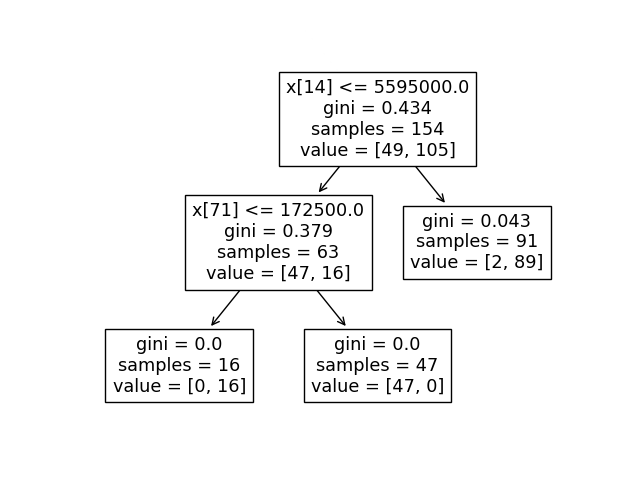

In [17]:
### DecisionTreeClassifier
%matplotlib widget

from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from matplotlib import pyplot as plt

clf = DecisionTreeClassifier(max_leaf_nodes=3, random_state=0)
clf.fit(X_train, y_train)
n_nodes = clf.tree_.node_count
children_left = clf.tree_.children_left
children_right = clf.tree_.children_right
feature = clf.tree_.feature
threshold = clf.tree_.threshold

node_depth = np.zeros(shape=n_nodes, dtype=np.int64)
is_leaves = np.zeros(shape=n_nodes, dtype=bool)
stack = [(0, 0)]  # start with the root node id (0) and its depth (0)
while len(stack) > 0:
    # `pop` ensures each node is only visited once
    node_id, depth = stack.pop()
    node_depth[node_id] = depth

    # If the left and right child of a node is not the same we have a split
    # node
    is_split_node = children_left[node_id] != children_right[node_id]
    # If a split node, append left and right children and depth to `stack`
    # so we can loop through them
    if is_split_node:
        stack.append((children_left[node_id], depth + 1))
        stack.append((children_right[node_id], depth + 1))
    else:
        is_leaves[node_id] = True

print(
    "The binary tree structure has {n} nodes and has "
    "the following tree structure:\n".format(n=n_nodes)
)
for i in range(n_nodes):
    if is_leaves[i]:
        print(
            "{space}node={node} is a leaf node.".format(
                space=node_depth[i] * "\t", node=i
            )
        )
    else:
        print(
            "{space}node={node} is a split node: "
            "go to node {left} if X[:, {feature}] <= {threshold} "
            "else to node {right}.".format(
                space=node_depth[i] * "\t",
                node=i,
                left=children_left[i],
                feature=feature[i],
                threshold=threshold[i],
                right=children_right[i],
            )
        )

tree.plot_tree(clf)
plt.show()

Output()

Output()

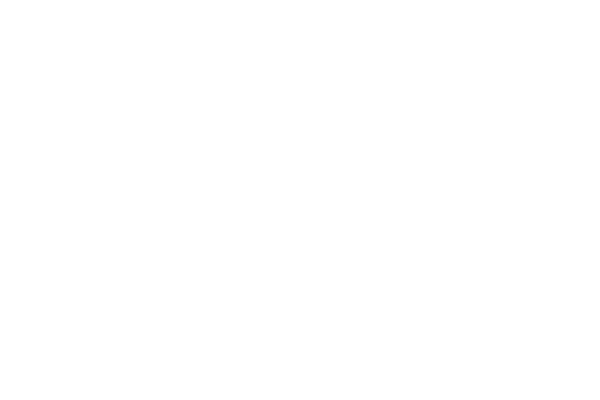

In [18]:
### Decision Tree classifier with tree and tuning capability
%matplotlib widget

from sklearn.preprocessing import StandardScaler, MinMaxScaler, MaxAbsScaler
from sklearn.tree import DecisionTreeClassifier, plot_tree
output = ipywidgets.Output()
output_results = ipywidgets.Output()

plt.rcParams.update({'figure.max_open_warning': 0})
plt.rcParams['figure.figsize'] = [6, 4]

### parameters
plt.figure()

### computation
class Classifier(object):
    def __init__(self, qgrid, X_train, y_train, X_test, y_test, labels):
        self.qgrid                         = qgrid
        self.X_train = self.X_train_scaled = X_train
        self.y_train                       = y_train
        self.X_test  = self.X_test_scaled  = X_test
        self.y_test                        = y_test
        self.labels                        = labels
        #### qgrid widgets
        self.qgrid_w      = ipywidgets.SelectionRangeSlider(index = (10, len(qgrid)-1), options=qgrid, description='q_range', continuous_update=False)
        self.qgrid_w.observe(self.update_input_widgets, names='value')
        
        #### classifier widgets
        self.classifier_w = ipywidgets.Dropdown(value='SVM', options = ["SVM", "DecisionTree"], description='classifier',    continuous_update=False)
        self.classifier_w.observe(self.update_input_widgets, names='value')
        
        #### normalization widgets
        self.normalize_w = ipywidgets.Dropdown(value='None', options = ["None","StandardScaler", "MinMax", "MaxAbsScaler"], description='Normalizer',    continuous_update=False)
        self.normalize_w.observe(self.update_input_widgets, names='value')        
        
        out = ipywidgets.interactive_output(self.display_widgets,{'a':self.classifier_w} )
#         display(ipywidgets.Label(value='----- Classification -----'), out)
        self.display_widgets(a = self.classifier_w)
        display(output)
        display(output_results)
        
        #### load classifier widgets
        self.classifier_widgets()
        
    def classifier_widgets(self):
        #### Decusion Tree parameter
        self.criterion_w = ipywidgets.Dropdown(value = "gini", options=["gini", "entropy", "log_loss"], description='criterion', )


    @output.capture(clear_output=True)
    def display_widgets(self, a):
        display(ipywidgets.VBox([self.qgrid_w, self.normalize_w, self.classifier_w]))
        
        if self.classifier_w.value == "DecisionTree": 
            display(ipywidgets.HBox([self.criterion_w]))
        self.execute_w = ipywidgets.Button(description='RUN Classifier')
        self.execute_w.on_click(self.on_button_clicked)
        display(self.execute_w)
        
    def update_input_widgets(self, *args):
        
        
        #### None case
        self.X_train_scaled = self.X_train[:,self.qgrid_w.index[0]:self.qgrid_w.index[1]]
        self.X_test_scaled  = self.X_test[:,self.qgrid_w.index[0]:self.qgrid_w.index[1]]
        
        if self.normalize_w.value   != "None":
            if self.normalize_w.value   == "StandardScaler": scaler=StandardScaler()
            elif self.normalize_w.value == "MinMax":         scaler=MinMaxScaler()
            elif self.normalize_w.value == "MaxAbsScaler":   scaler=MaxAbsScaler()

            self.X_train_scaled = scaler.fit_transform(self.X_train_scaled)
            self.X_test_scaled  = scaler.transform(self.X_test_scaled)

#         if self.classifier_w.value == "DecisionTree": 
#             self.DecisionTree_clf()
            
        print(self.qgrid_w.value, self.classifier_w.value, self.normalize_w.value, self.X_train_scaled.shape)
    
    @output_results.capture(clear_output=False)
    def performace_matrices(self, true, pred, labels, **kwargs):

        df_class = pd.DataFrame({'true': true, 'pred':pred}, columns=['true','pred'])
        try:
            print(kwargs['dataset'])
        except:
            pass
        print('confustion matrix ...', '\n',pd.crosstab(df_class['true'], df_class['pred'], rownames=['Actual'], colnames=['Predicted']))
        print(classification_report(df_class['true'], df_class['pred'], target_names=labels))

    @output.capture(clear_output=False)
    def DecisionTree_output(self, a):
        clf = DecisionTreeClassifier(criterion=self.criterion_w.value).fit(self.X_train_scaled, self.y_train)
        output_results.clear_output()
        
        y_test_pred=clf.predict(self.X_test_scaled)
        self.performace_matrices(self.y_test, y_test_pred, self.labels, dataset="-------- Testing --------")
        
        y_train_pred=clf.predict(self.X_train_scaled)
        self.performace_matrices(self.y_train, y_train_pred, self.labels, dataset="-------- Training --------")

        plt.cla()
        plot_tree(clf, filled=True, fontsize=None)
#         plt.title("Decision tree trained on all the PDB dataset")
        plt.tight_layout()
        plt.show()
    
    def on_button_clicked(self, *args):        
        out = ipywidgets.interactive_output(self.DecisionTree_output, {'a':self.classifier_w} )

d = Classifier(qgrid, X_train, y_train, X_test, y_test, labels)

In [19]:
### RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score


num_features = X.shape[1]

#### print function
def print_best_worst (scores):
    scores = sorted(scores, reverse = True)
    
    print("The 5 best features selected by this method are :")
    for i in range(5):
        print(scores[i][1])
    
    print ("The 5 worst features selected by this method are :")
    for i in range(5):
        print(scores[len(scores)-1-i][1])

#### Mean Decrease Impurity
clf = RandomForestClassifier()
clf.fit(X,label_encoder(y))
scores = []
for i in range(num_features):
    scores.append((clf.feature_importances_[i],qgrid[i]))

print_best_worst(scores)
results = dict()
_,results['RF-mean-impunity'] =zip (*scores)

#### Mean Decrease Accuracy

scores = []
clf = RandomForestClassifier()
score_normal = np.mean(cross_val_score(clf, X, y, cv = 2))

# X_shuffled = X.copy()
# np.random.shuffle(X_shuffled[X.columns[i]])

# X_shuffled.meanfreq
for i in range(num_features):
    X_shuffled = X.copy()
    scores_shuffle = []
    for j in range(3):
        np.random.seed(j*3)
        np.random.shuffle(X_shuffled[i])
        score = np.mean(cross_val_score(clf, X_shuffled, label_encoder(y), cv = 2))
        scores_shuffle.append(score)
        
    scores.append((score_normal - np.mean(scores_shuffle), qgrid[i]))

scores,score_normal
print_best_worst(scores)
_,results['RF-mean-accuricy'] =zip (*scores)

The 5 best features selected by this method are :
0.01
0.0
0.57
0.02
0.71
The 5 worst features selected by this method are :
0.06
0.16
0.17
0.24
0.27
The 5 best features selected by this method are :
1.81
1.79
1.78
1.76
0.41
The 5 worst features selected by this method are :
0.56
0.58
0.6
0.2
0.59


Estimated number of clusters: 0
Estimated number of noise points: 154
Homogeneity: 0.000
Completeness: 1.000
V-measure: 0.000
Adjusted Rand Index: 0.000
Adjusted Mutual Information: 0.000


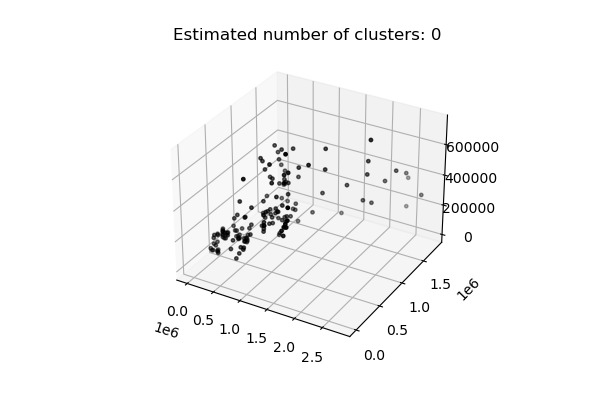

In [10]:
### DBSCAN
from sklearn.cluster import DBSCAN
from sklearn import metrics
import matplotlib.pyplot as plt


labels_true = y_train
db = DBSCAN(eps=0.1, min_samples=4).fit(X_train[:,[30,60, 150]])
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print("Estimated number of clusters: %d" % n_clusters_)
print("Estimated number of noise points: %d" % n_noise_)
print("Homogeneity: %0.3f" % metrics.homogeneity_score(labels_true, labels))
print("Completeness: %0.3f" % metrics.completeness_score(labels_true, labels))
print("V-measure: %0.3f" % metrics.v_measure_score(labels_true, labels))
print("Adjusted Rand Index: %0.3f" % metrics.adjusted_rand_score(labels_true, labels))
print(
    "Adjusted Mutual Information: %0.3f"
    % metrics.adjusted_mutual_info_score(labels_true, labels)
)

fig = plt.figure()
ax  = fig.add_subplot(projection='3d')


# Black removed and is used for noise instead.
unique_labels = set(labels)
colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = labels == k

    xy = X_train[class_member_mask & core_samples_mask]
    ax.scatter(
        xy[:, 30],
        xy[:, 60],
        xy[:, 150],
        color=tuple(col),
        s=14,
    )

    xy = X_train[class_member_mask & ~core_samples_mask]
    ax.scatter(
        xy[:, 30],
        xy[:, 60],
        xy[:, 150],
        color=tuple(col),
        s=6,
    )

plt.title("Estimated number of clusters: %d" % n_clusters_)
plt.show()

In [ ]:
### SVM - contour plot boundary -- fails to load 
%matplotlib widget

def make_meshgrid(x, y, h=10000):
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    return xx, yy

def plot_contours(ax, clf, xx, yy, **params):
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out

#### ref - https://www.geeksforgeeks.org/find-location-of-an-element-in-pandas-dataframe-in-python/
def getIndexes(dfObj, value):
    listOfPos = []   # Empty list
    result = dfObj.isin([value])  # isin() method will return a dataframe with boolean values, True at the positions where element exists
    seriesObj = result.any()      # any() method will return a boolean series
    columnNames = list(seriesObj[seriesObj == True].index)      # Get list of column names where element exists
    for col in columnNames:   # Iterate over the list of columns and extract the row index where element exists
        rows = list(result[col][result[col] == True].index)
        for row in rows:
            listOfPos.append((row, col))  # This list contains a list tuples with the index of element in the dataframe
    return listOfPos

model = svm.SVC()
clf = model.fit(X, y)

# title for the plots
fig, ax = plt.subplots()
title = ('Decision surface of linear SVC ')
# Set-up grid for plotting.
X0, X1 = X[:, 0], X[:, 1]
xx, yy = make_meshgrid(X0, X1)

plot_contours(ax, clf, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)
ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
ax.set_ylabel('y label here')
ax.set_xlabel('x label here')
ax.set_xticks(())
ax.set_yticks(())
ax.set_title(title)
ax.legend()
plt.show()

In [ ]:
### Simple SVM Classifier
clf = svm.SVC()  # kernel ='poly', degree = 10   # kernel='linear'
clf.fit(X_train, y_train)
y_test_pred=clf.predict(X_test)

df_class = pd.DataFrame({'test-true':y_test, 'test-pred':y_test_pred},columns=['test-true','test-pred'])
print('confustion matrix ...', '\n',pd.crosstab(df_class['test-true'], df_class['test-pred'], rownames=['Actual'], colnames=['Predicted']))
print(classification_report(df_class['test-true'], df_class['test-pred'], target_names=labels))

<Axes: >

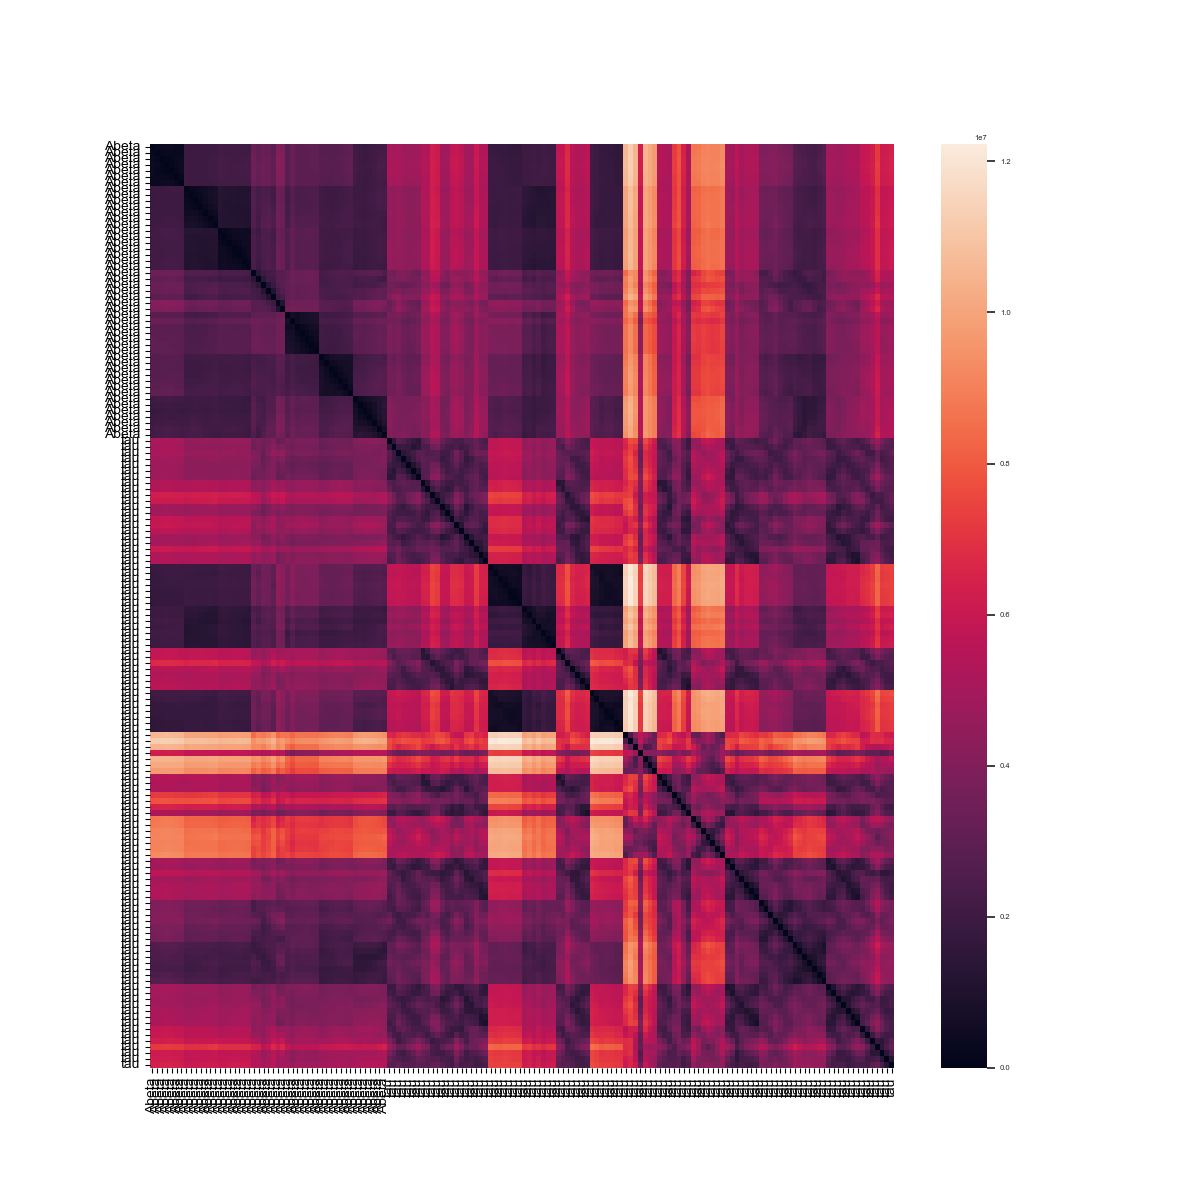

In [56]:
### correlation plots
%matplotlib widget
from scipy.spatial.distance import euclidean
import numpy as np
import seaborn as sns

input_ = X_train[:,30:]
ticks_ = y_train_l #pdb_train #pdb_train

R = np.zeros((len(input_), len(input_)))

for row_ in range(len(input_)):
    for col_ in range(len(input_)):
        R[row_,col_] = euclidean(input_[row_],input_[col_])

fig, ax = plt.subplots(figsize=(12, 12))

sns.set(font_scale=0.5)
sns.heatmap(R, xticklabels=ticks_, yticklabels=ticks_, )  #vmin=0, vmax=1

In [110]:
### specs : names - file , columns
import glob, ast

file        = "/Users/bashit.a/Documents/Alzheimer/Mar-2023/Mar-2023-Samples-updated.xlsx"
column_names= {"Diffuse_Plaque":1 , "Tissue":0}   # "Diffuse_Plaque"   "Neurofibrillary_Tangle_(tau)"    "Neuritic_Plaque"  "Tissue"
BNL_dir     = '/Volumes/HDD/BNL-Data/Mar-2023'
sub_dir     = "CSV_Conv-8-point"  # CSV_Conv-8-point  CSV
sheet       = 'Mar-2023-Samples'

### read dataframe
df = pd.read_excel(file, sheet_name=sheet)
df["File_Loc"] = pd.Series([], dtype=str)
for idx, file in zip(df.index, df['File']):
    for file_search in glob.iglob(f'{BNL_dir}/**/*', recursive=True):
        if file_search.find(file) > -1 and f'/{sub_dir}/' in file_search:
            df.at[idx, 'File_Loc'] = file_search
            break

Iq_values = []
labels    = []
for column_name,label in column_names.items():
    ### indices where column values are located
    indices = df[column_name].dropna().index
    ### looping over columns
    for idx in indices:
        # print(df['File_Loc'][idx], '--> ', flatten(pd.eval(df[column_name].dropna()[idx])), '-->', ast.literal_eval(df['bkg'][idx]) if type(df['bkg'][idx]) is str else 'NaN' )

        df_temp = pd.read_csv(df['File_Loc'][idx], delimiter=",")

        if type(ast.literal_eval(df[column_name][idx])) is dict:
            for k, v in (ast.literal_eval(df[column_name][idx])).items():
                print(k,v)
        elif type(ast.literal_eval(df[column_name][idx])) is tuple:
            print(  flatten(list(ast.literal_eval(df[column_name][idx]))) )

        elif type(ast.literal_eval(df[column_name][idx])) is list:
            print( list(ast.literal_eval(df[column_name][idx])))

        frames = flatten( list(ast.literal_eval(df[column_name][idx])) )

        Iq_values.append( df_temp.iloc[frames].values )
        labels.append([label]*len(frames))
Iq = np.vstack(Iq_values)
labels = np.array(flatten(labels)).reshape(-1,1)

[1394, 1395, 1473, 1478]
[2547, 2548, 2534, 2535, 2536, 2537, 2423, 2425, 2426, 2410, 2411, 2413, 2299, 2300, 2302, 2284, 2286, 2287, 2288, 2289, 2175, 2176, 2178, 2160, 2162, 2164, 2165, 2051, 2052, 2053, 2054, 2037, 2038, 2039, 2041, 1927, 1928, 1929, 1930]
[2479]
[314]
[18, 137]
[3111, 3212]
[1593, 1594, 1598, 1439, 1430, 1276]
[1887, 1890, 1891, 1895, 1824, 1826, 1827, 1828, 1829, 1763, 1765, 1766, 1768, 1769, 1772, 1700, 1705, 1638, 1639, 1643, 1645, 1648, 1583, 1584, 1519, 1521, 1523, 1452, 1453, 1454, 1456, 1457, 1458, 1459]
[2014, 2015, 2017, 2019, 2020, 2023, 2001, 2002, 2003, 2007, 2008, 2009, 1892, 1893, 1894, 1896, 1899, 1900]
[648, 651, 654, 657, 686, 688, 690, 693, 771, 775, 776, 779, 809, 811, 813, 814, 1037, 1039, 1041, 1043, 1152, 1153, 1154, 1156, 1157, 1161, 1163, 1276, 1277, 1278]
[2144, 2128, 2125]
[169, 170, 172, 173, 174, 175, 176, 177, 178, 179, 193, 194, 195, 197, 198, 199, 200, 201, 202, 293, 294, 295, 296, 297, 298, 300, 301, 302, 303, 316, 318, 319, 320, 321

In [111]:
### import file and preprocess
import pandas as pd
from essential_func import *

qgrid2 = np.hstack([np.arange(0.005, 0.0499, 0.001), np.arange(0.05, 0.099, 0.002), np.arange(0.1, 3.2, 0.005)])
lidx = np.argmin(qgrid2 < 0.7)   # qvalue = 0.7,  idx = 190
uidx = np.argmin(qgrid2 < 1.46)   # qvalue = 1.46, idx = 342

# load data
### specs : names - file , columns
file        = "/Users/bashit.a/Documents/Alzheimer/Mar-2023/Mar-2023-Samples-updated.xlsx"
sheet       = 'Mar-2023-Samples'
column_names= {"Diffuse_Plaque":1 , "Tissue":0}    # "Diffuse_Plaque"   "Neurofibrillary_Tangle_(tau)"    "Neuritic_Plaque"  "Tissue"
BNL_dir     = '/Volumes/HDD/BNL-Data/Mar-2023'
sub_dir     = "CSV_Conv-8-point"                   # CSV_Conv-8-point  CSV


### read dataframe
df = pd.read_excel(file, sheet_name=sheet)
df["File_Loc"] = pd.Series([], dtype=str)
for idx, file in zip(df.index, df['File']):
    for file_search in glob.iglob(f'{BNL_dir}/**/*', recursive=True):
        if file_search.find(file) > -1 and f'/{sub_dir}/' in file_search:
            df.at[idx, 'File_Loc'] = file_search
            break

Iq_values = []
labels    = []
files = []
frames_t = []
for column_name,label in column_names.items():
    ### indices where column values are located
    indices = df[column_name].dropna().index
    ### looping over columns
    for idx in indices:
        # print(df['File_Loc'][idx], '--> ', flatten(pd.eval(df[column_name].dropna()[idx])), '-->', ast.literal_eval(df['bkg'][idx]) if type(df['bkg'][idx]) is str else 'NaN' )

        df_temp = pd.read_csv(df['File_Loc'][idx], delimiter=",")

        if type(ast.literal_eval(df[column_name][idx])) is dict:
            for k, v in (ast.literal_eval(df[column_name][idx])).items():
                # print(k,v)
                pass
        elif type(ast.literal_eval(df[column_name][idx])) is tuple:
            # print(  flatten(list(ast.literal_eval(df[column_name][idx]))) )
            pass

        elif type(ast.literal_eval(df[column_name][idx])) is list:
            # print( list(ast.literal_eval(df[column_name][idx])))
            pass

        frames = flatten( list(ast.literal_eval(df[column_name][idx])) )

        Iq_values.append( df_temp.iloc[frames].values )
        labels.append([label]*len(frames))
        files.append(df['File_Loc'][idx])
        frames_t.append(frames)

x = np.vstack(Iq_values)
x = x[:,lidx:uidx].astype(np.float32)
assert np.any(np.isnan(x))==False, "X contains NaN values"
_, x = interpolate_missing(x)
x = x/np.max(x,axis=1).reshape(-1,1)

y = np.array(flatten(labels) ,dtype=np.float32).reshape(-1,1)
n_samples = len(y)

In [15]:
### Visualize PDB file
%matplotlib widget
import nglview as nv

pdb_file = "/Users/bashit.a/Documents/Alzheimer/PDB/Deepti Murthy/Abeta/5OQV/5OQV30L-2D.pdb"
### computation
# from Bio.PDB import *
# pdb_parser = PDBParser()
# structure = pdb_parser.get_structure(_,pdb_file)
# view = nv.show_biopython(structure)
# view

view = nv.show_file(pdb_file, default=False)
view.add_cartoon(selection="protein")
# view.add_surface(selection="protein", opacity=0.3)
view.center()  # view.camera = 'orthographic'
view

NGLWidget()

In [16]:
df = pd.DataFrame([None],dtype=str)
df["File"] = None
df["File_Loc"] = None
df["Frames"] = None
df['Tissue'] = str(tissue_fr)
df

,0,File,File_Loc,Frames,Tissue
0,None,None,None,None,"[1593, 1594, 1598, 1439, 1430, 1276]"


AttributeError: 'Output' object has no attribute 'model'

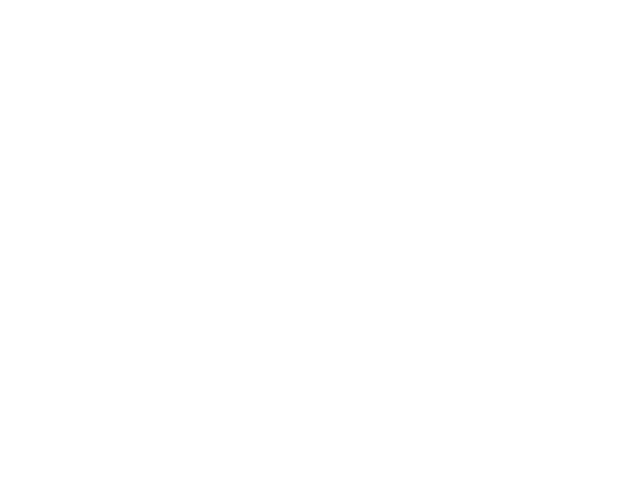

In [17]:
%matplotlib widget
qvalue_lower_bound = 1
qvalue_upper_bound = 1.45
qgrid2 = np.hstack([np.arange(0.005, 0.0499, 0.001), np.arange(0.05, 0.099, 0.002), np.arange(0.1, 3.2, 0.005)])
lidx = np.argmin(qgrid2 < qvalue_lower_bound)   # qvalue = 0.7,  idx = 190
uidx = np.argmin(qgrid2 < qvalue_upper_bound)   # qvalue = 1.46, idx = 342

plt.close('all')
plt.figure()
# plt.plot(qgrid2[lidx:uidx-2], out.model.model.feature.weight.detach().numpy()[62])
plt.imshow(out.model.model.feature.weight.detach().numpy(), cmap='jet')
plt.colorbar()
pass

(1, 88)

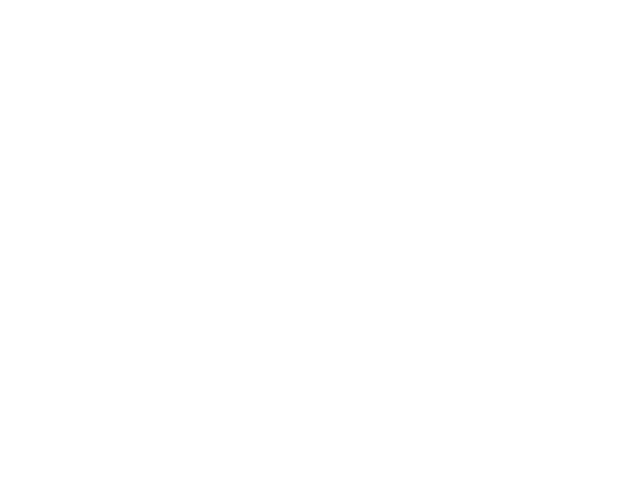

In [31]:
frame = 1305
plt.close()
plt.figure()
name = 'layer2'
extractor.extracted_features[name].detach().numpy()[frame].shape

plt.figure()
plt.imshow(out.model.model.feature.weight.data)

In [112]:
#### Inference data import to XrayData, given file, file_loc and width and height

input_file = ["1898_CING-roi0_0_0_masked_intp.h5", "1948 V1-roi0_0_0_masked.h5"]
input_file_loc = ['/Volumes/HDD/BNL-Data/Mar-2023/1898/CSV_Conv-8-point/1898_CING-roi0_0_0_masked_intp.h5_merged.csv', '/Volumes/HDD/BNL-Data/Mar-2023/1948/CSV_Conv-8-point/1948 V1-roi0_0_0_masked.h5_merged.csv']
input_width_height = [(41,41), (62,61) ]

df = pd.DataFrame([None],dtype=str)
df["File"] = None
df["File_Loc"] = None
df["Frames"] = None

for idx, (f, f_loc, w_h) in enumerate(zip(input_file, input_file_loc, input_width_height)):
    df.at[idx, "File"] = f
    df.at[idx, "File_Loc"] = f_loc
    Width, Height = w_h
 
    df.at[idx, "Frames"] = str(np.arange(0, Width*Height,dtype=int).tolist())
    
    print(idx, f, f_loc, w_h)
# type(ast.literal_eval( df.iloc[idx][column_name]) )

# file = open("arr", "wb")              # Open a binary file in write mode
# np.save(file, dataset_train.Iq_bkg)   # Save array to the file
# file.close                            # Close the file


# file = open("arr", "rb")  # Open the file in read binary mode
# arr1 = np.load(file)      # Read the file to numpy array
# print(arr1)               # Close the file

df

0 1898_CING-roi0_0_0_masked_intp.h5 /Volumes/HDD/BNL-Data/Mar-2023/1898/CSV_Conv-8-point/1898_CING-roi0_0_0_masked_intp.h5_merged.csv (41, 41)
1 1948 V1-roi0_0_0_masked.h5 /Volumes/HDD/BNL-Data/Mar-2023/1948/CSV_Conv-8-point/1948 V1-roi0_0_0_masked.h5_merged.csv (62, 61)


,0,File,File_Loc,Frames
0,None,1898_CING-roi0_0_0_masked_intp.h5,/Volumes/HDD/BNL-Data/Mar-2023/1898/CSV_Conv-8...,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,..."
1,NaN,1948 V1-roi0_0_0_masked.h5,/Volumes/HDD/BNL-Data/Mar-2023/1948/CSV_Conv-8...,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,..."


In [2]:
%matplotlib widget
import plotly.graph_objects as go
import plotly.express as px

fig = go.Figure()
### input - raw
# idx=0
# fig = go.Figure(data = go.Scatter(x = qgrid2[lidx:uidx], y = input.squeeze(1).detach().numpy().tolist()[idx],  mode='lines', name= 'in-raw-' + str(dataset_train.frames[idx])))
for idx in range(0, len(dataset_train.frames)):
    legendgroup = 'in-raw-'
    name = legendgroup + str(dataset_train.frames[idx])
    fig.add_scatter(x = qgrid2[lidx:uidx], y = input.squeeze(1).detach().numpy().tolist()[idx],  mode='lines', text=name, name= name, legendgroup='input', showlegend=True)

### input - reconstructed
# for idx in range(0, len(dataset_train.frames)):
#     legendgroup = 'in-rec-'
#     name = legendgroup + str(dataset_train.frames[idx])
#     fig.add_scatter(x = qgrid2[lidx:uidx], y = target.squeeze(1).detach().numpy().tolist()[idx],  mode='lines', text=name, name= name, legendgroup='input', showlegend=True)

### test - raw
with torch.no_grad():
    model.eval()
    test = next(iter(validation_loader))[0]
    test.unsqueeze_(1)
    test  = input_scale*test
    ypred = model(test)
    loss  = criterion(test, ypred)

for idx in range(0, len(dataset_val.frames)):
    legendgroup = 'val-raw-'
    name  = legendgroup + str(dataset_val.frames[idx])
    fig.add_scatter(x = qgrid2[lidx:uidx], y = test.squeeze(1).detach().numpy().tolist()[idx],  mode='lines', text = name , name= name, legendgroup='output' , showlegend=True)

# for idx in range(0, len(dataset_val.frames)):
#     legendgroup = 'val-rec-'
#     name = legendgroup + str(dataset_val.frames[idx])
#     fig.add_scatter(x = qgrid2[lidx:uidx], y = ypred.squeeze(1).detach().numpy().tolist()[idx],  mode='lines', text= name, name= name, legendgroup='output', showlegend=True)


fig.update_layout(autosize=False, width=800, height=800)

NameError: name 'dataset_train' is not defined

In [119]:
import torch
import torch.nn as nn
import torch.optim as optim
from Bio import PDB
import Bio

# Load PDB file
structure_id = '5oqv'
pdb_file = '5oqv.pdb'
structure = PDB.PDBParser().get_structure(structure_id, pdb_file)
amino_acid_to_index = {
    'A': 0,
    'R': 1,
    'N': 2,
    'D': 3,
    'C': 4,
    'E': 5,
    'Q': 6,
    'G': 7,
    'H': 8,
    'I': 9,
    'L': 10,
    'K': 11,
    'M': 12,
    'F': 13,
    'P': 14,
    'S': 15,
    'T': 16,
    'W': 17,
    'Y': 18,
    'V': 19
}

# Extract coordinates and sequence
coordinates = []
sequence = []
for model in structure:
    for chain in model:
        for residue in chain:
            coordinates.append(residue['CA'].get_coord())
            sequence.append(residue.resname)

# Convert coordinates to PyTorch tensor
coordinates_tensor = torch.tensor(coordinates)

# Convert sequence to numerical representation (one-hot encoding)
sequence_encoding = []
for amino_acid in sequence:
    amino_acid = Bio.Data.PDBData.protein_letters_3to1[amino_acid]

    encoding = torch.eye(20)[amino_acid_to_index[amino_acid]]
    sequence_encoding.append(torch.argmax(encoding))
sequence_tensor = torch.tensor(sequence_encoding,dtype=torch.float32).unsqueeze(1)

# Create a PyTorch dataset class for protein data
class ProteinDataset(torch.utils.data.Dataset):
    def __init__(self, coordinates, sequence):
        self.coordinates = coordinates
        self.sequence = sequence

    def __len__(self):
        return len(self.coordinates)

    def __getitem__(self, index):
        coordinates = self.coordinates[index]
        sequence = self.sequence[index]
        return coordinates, sequence

# Create a dataset and data loader from the protein data
dataset = ProteinDataset(coordinates_tensor, sequence_tensor)
data_loader = torch.utils.data.DataLoader(dataset, batch_size=32, shuffle=True)

# Define a simple neural network model
class ProteinModel(nn.Module):
    def __init__(self):
        super(ProteinModel, self).__init__()
        self.fc1 = nn.Linear(3, 128)  # input layer (3D coordinates) -> hidden layer (128 units)
        self.fc2 = nn.Linear(128, 1)  # hidden layer (128 units) -> output layer (1 unit)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = self.fc2(x)
        return x

# Initialize the model, loss function, and optimizer
model = ProteinModel()
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Train the model
for epoch in range(10):
    for batch in data_loader:
        coordinates, sequence = batch
        optimizer.zero_grad()
        outputs = model(coordinates)
        loss = criterion(outputs, sequence)
        loss.backward()
        optimizer.step()
        print(loss)

tensor(484.7783, grad_fn=<MseLossBackward0>)
tensor(433.1188, grad_fn=<MseLossBackward0>)
tensor(257.3050, grad_fn=<MseLossBackward0>)
tensor(208.1928, grad_fn=<MseLossBackward0>)
tensor(161.9749, grad_fn=<MseLossBackward0>)
tensor(141.1602, grad_fn=<MseLossBackward0>)
tensor(69.9839, grad_fn=<MseLossBackward0>)
tensor(89.5476, grad_fn=<MseLossBackward0>)
tensor(88.0317, grad_fn=<MseLossBackward0>)
tensor(38.7450, grad_fn=<MseLossBackward0>)
tensor(52.0960, grad_fn=<MseLossBackward0>)
tensor(41.7946, grad_fn=<MseLossBackward0>)
tensor(35.6082, grad_fn=<MseLossBackward0>)
tensor(32.4753, grad_fn=<MseLossBackward0>)
tensor(46.6335, grad_fn=<MseLossBackward0>)
tensor(42.6624, grad_fn=<MseLossBackward0>)
tensor(67.9798, grad_fn=<MseLossBackward0>)
tensor(63.4471, grad_fn=<MseLossBackward0>)
tensor(54.5537, grad_fn=<MseLossBackward0>)
tensor(51.2906, grad_fn=<MseLossBackward0>)
tensor(59.0458, grad_fn=<MseLossBackward0>)
tensor(41.8833, grad_fn=<MseLossBackward0>)
tensor(71.4750, grad_fn=<M

/var/folders/nk/89hkzs1118vd7g7w28qfmn0r0000gq/T/ipykernel_29326/3048629869.py:44: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at /Users/runner/work/pytorch/pytorch/pytorch/torch/csrc/utils/tensor_new.cpp:248.)
  coordinates_tensor = torch.tensor(coordinates)


In [165]:
df_t = pd.read_csv('/Users/bashit.a/Documents/Alzheimer/PDB/CSV/Lesions/Abeta/Abeta-20L/2LMO.csv', delimiter=',')
peaks,_ = find_peaks(df_t['3'][lidx:uidx], distance=100)
qvalues[lidx:uidx][peaks]

array([1.37])

In [80]:
### combining PDB files into one file

from Bio import PDB

# Create a PDB parser
parser = PDB.PDBParser(QUIET=True)
io = PDB.PDBIO()

# List of PDB files to combine
pdb_files
# Create a new structure to hold the combined data
combined_structure = PDB.Structure.Structure('combined')

# Loop through each PDB file and add its contents to the combined structure
for pdb_file in pdb_files:
    print(pdb_file)
    structure = parser.get_structure(_, pdb_file)
    print(structure)
    for model in structure:
        combined_structure.add(model)

# Save the combined structure to a new PDB file
io.set_structure(combined_structure)
io.save('combined.pdb')

5oqv layer  l29d84.pdb
<Structure id=<Structure id=5oqv layer  l9d24.pdb>>
5oqv layer  l4d9.pdb
<Structure id=<Structure id=5oqv layer  l9d24.pdb>>


PDBConstructionException: 0 defined twice

In [120]:
from Bio import PDB
import os, subprocess
import pandas as pd
import numpy as np

def fixedLayerCSV(nlayers, layers_dir, header, parent_dir, compute_degs=[-3,-2,-1,0,1,2,3]):
    csv_dir = os.path.join(parent_dir, 'CSV')
    pdb_dir = os.path.join(parent_dir, 'PDB')

    if not os.path.isdir(csv_dir):
        os.makedirs(csv_dir)
    if not os.path.isdir(pdb_dir):
        os.makedirs(pdb_dir)    

    df = pd.DataFrame([],columns=['q', *compute_degs])
    for deg in compute_degs:
        os.chdir(layers_dir)
        ### gather PDB files accorind to layers and deg
        layers = np.arange(1,nlayers+1)
        degs = np.arange(0,nlayers*deg,deg) if deg else np.full(nlayers,0)
        structures = []
        for l,d in zip(layers, degs):
            file = f'{header} l{l}d{d}.pdb'
            if not os.path.isfile( os.path.join(layers_dir, file) ):
                raise FileNotFoundError(f'{file} is missing')
            structures.append(file)

        parser = PDB.PDBParser(QUIET=True)
        ms = PDB.Structure.Structure("master")

        ### comnine gathered PDB files (structures) into one PDB file
        i=0
        for structure in structures:    
            structure = parser.get_structure(_, structure)
            for model in structure:
                new_model=model.copy()
                new_model.id=i
                new_model.serial_num=i+1
                i=i+1
                ms.add(new_model)
        new_file = f'Combined {header} L{nlayers}D{"+" if deg >0 else ""}{deg}'
        ext = '.pdb'
        pdb_file_abs_loc_no_ext = os.path.join(pdb_dir, new_file )
        pdb_io = PDB.PDBIO()
        pdb_io.set_structure(ms)
        pdb_io.save( pdb_file_abs_loc_no_ext+ext )

        ### run crysol, and generatea dataframe with deg associated
        os.chdir(pdb_dir)
        subprocess.run(["crysol", pdb_file_abs_loc_no_ext+ext, "-lm", "99", "-fb", "18", "-sm", "2", "-ns", "201", "-dns", "0.334"], stdout = subprocess.DEVNULL)

        ## create a dataframe and save it to a file
        with open(f'{pdb_file_abs_loc_no_ext}.int','r') as file:
            contents = [line.split() for line in file.readlines()]
            for i in range(1, len(contents)):
                df.at[i,'q'], df.at[i,deg] = float(contents[i][0]), float(contents[i][1])

        [os.remove(pdb_file_abs_loc_no_ext + ext_) for ext_ in ['.abs', '.alm', '.log', '.int'] if os.path.isfile(new_file + ext_)]   # remove log files
    df.to_csv(os.path.join(csv_dir, new_file.rsplit('D',1)[0]+'.csv'), sep=',', index=False) # save in a csv file

### specs
max_layers = 2
layers_dir = '/Users/bashit.a/Documents/Alzheimer/PDB/5OQV/5OQV 3 deg 30'
header = '5oqv-1Layer'
compute_degs = [-3,-2,-1,0,1,2,3]
os.chdir(layers_dir)

### make output directory for CSV files to save
parent_dir =  layers_dir.rsplit('/',1)[0]

### run function call
for nlayers in range(1, max_layers+1):
    fixedLayerCSV(nlayers, layers_dir, header, parent_dir, compute_degs)